In [1]:
# -*- coding: utf-8 -*-

#Created on Sat Nov 21 16:42:26 2020

#@pypStag-Lessons #02
#@author: Alexandre JANIN
#__All rights reserved__

<div style="text-align: Right">
    <img src="./icons/pypStag_logographie_texte.jpg" width="200">
</div>

<center> <h1><b>Lesson 2 - The visualization of StagYY data using pypStag</b></h1> </center>

Functions, routines and documentation of **pypStag** may contain typos and unachieved branches. Before using this code, keep that in mind and contact me for bugs or development suggestions: **Alexandre JANIN, alexandre.janin@protonmail.com**

### **2D visualization**

An easy way to represent a 3D object is to display 2D slices of this object: surface, crossing the whole domain etc. In this lesson we will see how to visialize in 2D StagYY data using **pypStag**.


### **Lesson Summary**

    0. Package importation and plot parameters
    1. Maps of a Cartesian 2D object
    2. Maps of a Cartesian 3D object
    3. Maps of an Annulus object
    4. Maps of a Yin Yang objet

### **0. Package importation and plot parameters**

In [1]:
# Basic packages you will use in this lesson

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importation of pypStag

import sys
sys.path.append('../')           # referencing the pypStag directory

from pypStag.stagData import StagData        # pypStag objects package

from pypStag.stagViewer import contourfMap   # pypStag functions of plot

'contourfMap' is the main plot function of **pypStag.stagViewer**. This function automatically manages the different grid geometry and allows the user to work with only one generic plot function.

In [3]:
from pypStag.stagViewerMod import PlotParam  # graphical parameters for the plot

One of the specificity of **pypStag** is the use of the instance of a class object to define the graphical parameters of your figures. This object, *PlotParam*, contains the generic parameters of your figure like: its size, the colormap, if you want to take a colormap in logarithm, what are the bounds of your colormap, if want want to save your figure and under which name and file extension.
The idea behind this object Plotparam is to define just onces theses quantity that can be use in many other figures. For instance, if you want to inspect the temperature field of your model at different time, or for different simulations, you can save the instance of your PlotParam object you tuned (once) for your figures in a personal script and re-use it easily by call it as a package. It will make your script clearer avoiding unnecessary repetitions of commands that can be long for a plot.

Here below an example of a PlotParam instance with only a pre-defined vmin (min value), vmax (max value) and a colormap in log10:

In [5]:
# --- Creat a test (just for the example) PlotParam instance

ppar_test = PlotParam(vmin=0,vmax=1,log10=True)

You can have access at any time to all the field of the PlotParam instance to update it. For example, if you want save your figure without diplaying it:

In [6]:
ppar_test.show = False          # deactivate the plot
ppar_test.save = True           # activate the saving option
ppar_test.path = './'           # path of your figure file
ppar_test.name = 'test.png'     # name of your figure
ppar_test.dpi  = 300            # resolution

### **1. Maps of a Cartesian 2D object**

The Cartesian mesh is the most intuitive grid geometry. In this chapter we will see how to represent with a map a 2D cartesian object with **pypStag**. The first step is to read your Stag data creating a pypStag.StagData object as showed in the Lesson #01.

Let's start by reading a simple scalar field as a temperature field.

In [7]:
# --- Read and process

# # Set the path and the name of your Stag file

directory = './test_data'
fname = 'SRW42_t00001'

In [8]:
# Creat a StagData object from our file

sd = StagData(geometry='cart2D')
sd.stagImport(directory, fname)
sd.stagProcessing()

>> stagData| Reading and resampling: SRW42_t00001
>> stagData|   - 2D data detected: plan yz
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 320
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 320
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Temperature
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 2D cartesian grid geometry
>> stagData|       - data detected: plan yz
>> stagData|       - Build data grid for scalar field
>> stagData| Processing of stag data done!


Then, the second step, optional, consists in creat a PlotParam instance that will allow you to define graphical parameters. In the case you do not asign it to the plot function, a default version will be computed.

In [9]:
# --- Define your generic plot parameters option:

ppar_t   = PlotParam(cmap=plt.cm.inferno,save=False,aspect='equal',\
                     vmin=0,vmax=1,show=True,figsize=(10,3),nol=100,\
                     cbar=True,cbar_location='right')

The different options available are listed in the help of the PlotParam.

To compute the map of your 2D cartesian object, call the function 'contourfMap'. This function has only one mandatory argument, your pypStag.StagData object, all the other aguments are optional.


For a Cartesian 2D object, among the optional arguments of 'contourf' that will have an effect on your figure their is:
 - field = str, defines the field of your object you want to represent.
    'v' for the main (scalar field)
    'vx', 'vy', 'vz' for cartesian components of a vectorial field
    'vr', 'vtheta', 'vphi' for spherical components of a vectorial field.
 - stagVelocity = pypStag.StagData object containing the velocity field of the main pypStag.StagData.
 - plotparam = PlotParam instance, define the graphical parameter of the plot
 - plotparam_velo = PlotParam instance, define the graphical parameter of the velocity field
 - title = str, title of the plot
 - verbose = bool, if True, displays a verbose output

Let's start with the following simple example.

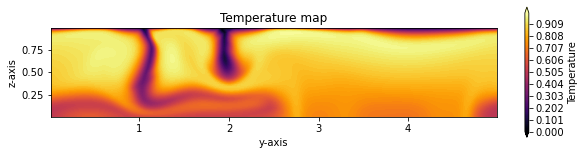

In [10]:
# --- Plot

title  = 'Temperature map'
output = contourfMap(sd,plotparam=ppar_t,title=title)

The function 'contourfMap' of the StagViewer module of **pypStag** allows to display the corresponding velocity field above the map. To do so, enter the velocity field as a pypStag.StagData object in the option 'stagVelocity'. Here below an example.

In [11]:
# --- Read and process the velocity

directory2 = './test_data'
fname2 = 'SRW42_vp00001'

sd2 = StagData(geometry='cart2D')
sd2.verbose = True
sd2.stagImport(directory2, fname2, resampling=[1,1,1],beginIndex=-1)
sd2.stagProcessing()

>> stagData| Reading and resampling: SRW42_vp00001
>> stagData|   - 2D data detected: plan yz
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 320
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 320
>> stagData|     - Nz = 64
>> stagData|   - Vectorial field detected: 4 fields
>> stagData|     -> Velocity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 2D cartesian grid geometry
>> stagData|       - data detected: plan yz
>> stagData|       - Build data grid for vectorial field
>> stagData| Processing of stag data done!


You can creat, in addition to the plot parameters of the map, a secondary PlotParam instance for the velocity field.

In [12]:
ppar_vp  = PlotParam(vscale=3e4,arrow_width=1e-3,qscale=1000,noa=2000,vmin=-9000,vmax=9000)

We can now recompute our previous map with the velocity field.

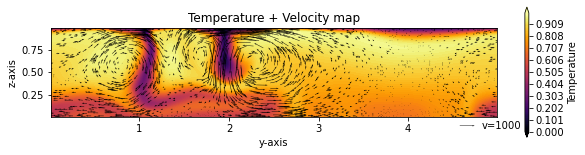

In [13]:
title  = 'Temperature + Velocity map'
output = contourfMap(sd,field='v',stagVelocity=sd2,plotparam=ppar_t,plotparam_velo=ppar_vp, title=title)

### **2. Maps of a Cartesian 3D object**

Now we have explored the visualization of a Catesian 2D data, in this chapter we will see how to represent with maps a 3D cartesian object with **pypStag**. As from 2D to 3D we gain a dimension, we will need to define a slicing axis. The first step is to read your Stag data creating a pypStag.StagData object as showed in the Lesson #01.

Let's start by reading a simple scalar field as a viscosity field.

In [33]:
# --- Read and process

# # Set the path and the name of your Stag file

directory = './test_data'
fname = 'SRW42mpi3D_eta00001'

In [34]:
# Creat a StagData object from our file

sd = StagData(geometry='cart3D')
sd.stagImport(directory, fname)
sd.stagProcessing()

>> stagData| Reading and resampling: SRW42mpi3D_eta00001
>> stagData|   - 3D data detected
>> stagData|     -> Grid geometry compatible with cart3D or spherical
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Viscosity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 3D cartesian grid geometry
>> stagData|       - Build data grid for scalar field
>> stagData| Processing of stag data done!


Then, the second step, optional, consists in creat a PlotParam instance that will allow you to define graphical parameters. In the case you do not asign it to the plot function, a default version will be computed.

In [40]:
# --- Define your generic plot parameters option:

ppar_eta = PlotParam(cmap=plt.cm.inferno,reverseCMAP=True,log10=True,aspect='equal',\
                     vmin=-1,vmax=3,show=True,figsize=(10,3),nol=100,\
                     cbar=True,cbar_location='right',antialiased=False)

The different options available are listed in the help of the PlotParam.

To compute the map of your 3D cartesian object, call the function 'contourfMap'. This function has only one mandatory argument, your pypStag.StagData object, all the other aguments are optional.


For a Cartesian 3D object, among the optional arguments of 'contourf' that will have an effect on your figure their is:
 - field = str, defines the field of your object you want to represent.
    'v' for the main (scalar field)
    'vx', 'vy', 'vz' for cartesian components of a vectorial field
    'vr', 'vtheta', 'vphi' for spherical components of a vectorial field.
 - stagVelocity = pypStag.StagData object containing the velocity field of the main pypStag.StagData.
 - axis = str or int, define the axis of the slice.
        axis = 0   # for a slice computed with the normal to the slicing plan, 
        axis = 'xy' or axis = 'yx' or axis = 1   # [Default], 
        axis = 'xz' or axis = 'zx' or axis = 2, 
        axis = 'yz' or axis = 'zy' or axis = 3
 - layer = int or float, index of the slice if axis > 0
 - normal = list of three int/float, define the normal of the slicing plan as define in paraview, only if axis = 0. Take the form: normal = (nx,ny,nz. (Default: normal = [1,0,0])
 - method = str: can be 'tri' or 'interp'. This parameter defines the graphical method of representation. If method = 'tri' then the map will be generated directly from the sliceData with triangulation (tricontourf). If method = 'interp' then the ma will be generated using first an interpolation on a regular lon/lat grid and then displayed with pcolormesh. NOTE: we recommend the 'tri' (triangulation) method [default, method = 'tri']
 - interp_method = str, interpolation method used to interpolate the extract slice on a new regular 2D grid. This parameter define the option of the function 'scipy.interpolate.griddata'. [Default, interp_method = 'nearest']
 - plotparam = PlotParam instance, defines the graphical parameters of the plot
 - plotparam_velo = PlotParam instance, defines the graphical parameters of the velocity field
 - title = str, title of the plot
 - verbose = bool, if True, displays a verbose output

The arguments 'axis', 'layer' and 'normal' control the slicing plan of the figure.

Let's start first with an example showing an 'yz' slice of the 3D data at the middle of the 'x'-axis.

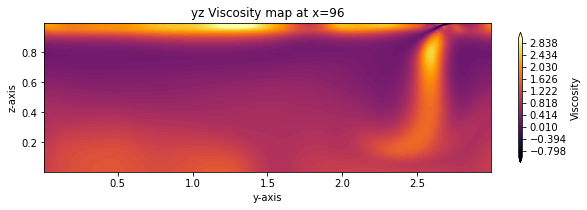

In [41]:
# --- Plot 

axis   = 'yz'                    # Take a slice on the yz plan
layer  = int(sd.x.shape[0]/2)    # Take the index 96

title  = axis + ' Viscosity map at x='+str(layer)
output = contourfMap(sd,field='v',axis=axis,layer=layer,title=title,plotparam=ppar_eta)

The following example shows the resulting figure for a slice in the 3D data according to a normal to a slicing plan (option axis = 0).

>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| Extraction of a slice along a plan defined by its normal (i.e. axis=0)
>> sliceData|    Normal to the slicing plan: 1,1,1
>> sliceData|    Search on the plan
>> sliceData|    Projection on the plan
>> sliceData|    - build a new cart2D geometry
>> sliceData|    - interpolation on the grid
>> sliceData|      -> Number of data points: 57220
>> sliceData|      -> Number of new points:  36864
>> sliceData|    - remove ghost points
>> sliceData| Slicing done successfully!
>> sliceData|     -> Time for the interpolation: 0.07166051864624023


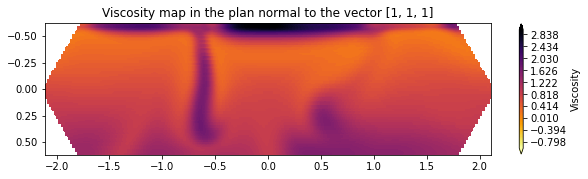

In [18]:
axis   = 0
normal = [1,1,1]     # slice with an origin of the slicing plan on the center of mass of the cart3D grid

title  = 'Viscosity map in the plan normal to the vector '+str(normal)
output = contourfMap(sd,field='v',axis=axis,normal=normal,title=title,plotparam=ppar_eta)


The function 'contourfMap' of the StagViewer module of **pypStag** allows to display the corresponding velocity field above the map. To do so, enter the velocity field as a pypStag.StagData object in the option 'stagVelocity'. Here below an example.

In [19]:
# --- Read and process the velocity

directory2 = './test_data'
fname2 = 'SRW42mpi3D_vp00001'

sd2 = StagData(geometry='cart3D')
sd2.verbose = True
sd2.stagImport(directory2, fname2, resampling=[1,1,1],beginIndex=-1)
sd2.stagProcessing()

>> stagData| Reading and resampling: SRW42mpi3D_vp00001
>> stagData|   - 3D data detected
>> stagData|     -> Grid geometry compatible with cart3D or spherical
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - Vectorial field detected: 4 fields
>> stagData|     -> Velocity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 3D cartesian grid geometry
>> stagData|       - Build data grid for vectorial field
>> stagData| Processing of stag data done!


You can creat, in addition to the plot parameters of the map, a secondary PlotParam instance for the velocity field.

In [20]:
ppar_vp  = PlotParam(vscale=7e3,arrow_width=3e-3,qscale=5e2,noa=2000,vmin=-9000,vmax=9000)

We can now recompute our previous map with the velocity field.

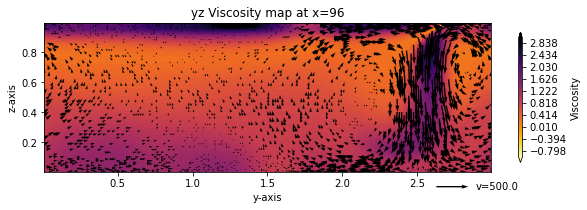

In [21]:
# --- Plot 

axis   = 'yz'                    # Take a slice on the yz plan
layer  = int(sd.x.shape[0]/2)    # Take the index 96

title  = axis + ' Viscosity map at x='+str(layer)
output = contourfMap(sd,field='v',axis=axis,layer=layer,title=title,stagVelocity=sd2,plotparam=ppar_eta,plotparam_velo=ppar_vp)

### **3. Maps on an Annulus object**

Now we have explored the visualization of a Catesian 2D and 3D data, in this chapter we will see how to represent with maps a 2D annulus object with **pypStag**. The first step is to read your Stag data creating a pypStag.StagData object as showed in the Lesson #01.

Let's start by reading a simple scalar field as a temperature field.

In [22]:
# --- Read and process

# # Set the path and the name of your Stag file

directory = './test_data'
fname = '2D_conv_dome_t00154'

In [23]:
# Creat a StagData object from our file

sd = StagData(geometry='annulus')
sd.stagImport(directory, fname)
sd.stagProcessing()

>> stagData| Reading and resampling: 2D_conv_dome_t00154
>> stagData|   - 2D data detected: plan yz
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 768
>> stagData|     - Nz = 128
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 768
>> stagData|     - Nz = 128
>> stagData|   - Scalar field detected
>> stagData|     -> Temperature
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 2D annulus grid geometry
>> stagData|       - data detected: plan yz
>> stagData|       - Creation of the spherical grids
>> stagData|       - Build data grid for scalar field
>> stagData| Processing of stag data done!


Then, the second step, optional, consists in creat a PlotParam instance that will allow you to define graphical parameters. In the case you do not asign it to the plot function, a default version will be computed.

In [24]:
# --- Define your generic plot parameters option:

ppar_t   = PlotParam(cmap=plt.cm.cividis,save=False,aspect='equal',\
                     vmin=0.12,vmax=1.12,show=True,figsize=(10,7),nol=100,\
                     cbar=True,cbar_location='left',rticks=True,gridlines=True)

The different options available are listed in the help of the PlotParam.

To compute the map of your annulus object, call the function 'contourfMap'. This function has only one mandatory argument, your pypStag.StagData object, all the other aguments are optional.

For an annulus object, among the optional arguments of 'contourf' that will have an effect on your figure their is:
 - field = str, defines the field of your object you want to represent.
    'v' for the main (scalar field)
    'vx', 'vy', 'vz' for cartesian components of a vectorial field
    'vr', 'vtheta', 'vphi' for spherical components of a vectorial field.
 - stagVelocity = pypStag.StagData object containing the velocity field of the main pypStag.StagData.
 - layer = int or float, index of the slice if axis > 0 
 - normal = list of three int/float, define the normal of the slicing plan as define in paraview, only if axis = 0. Take the form: normal = (nx,ny,nz. (Default: normal = [1,0,0])
 - method = str: can be 'tri' or 'interp'. This parameter defines the graphical method of representation. If method = 'tri' then the map will be generated directly from the sliceData with triangulation (tricontourf). If method = 'interp' then the ma will be generated using first an interpolation on a regular lon/lat grid and then displayed with pcolormesh. NOTE: we recommend the 'tri' (triangulation) method [default, method = 'tri']
 - interp_method = str, interpolation method used to interpolate the extract slice on a new regular 2D grid. This parameter define the option of the function 'scipy.interpolate.griddata'. [Default, interp_method = 'nearest']
 - pollenPlot = bool, if yes then generate a 'pollen plot'
 - pollenData = pypStag.StagData object that can be displayed on the pollen plot
 - layer = int, define the layer you want to display in the pollen plot [Default layer = -1 (surface)]. Only active if pollenPlot is True.
 - pollenField = str, equivalent to the argument field but for the pollen plot.
 - plotparam = PlotParam instance, define the graphical parameter of the plot
 - plotparam_velo = PlotParam instance, defines the graphical parameters of the velocity field
 - plotparam_pollen = PlotParam instance, defines the graphical parameters of the pollen plot
 - title = str, title of the plot
 - verbose = bool, if True, displays a verbose output

Let's start first with the following simple example.

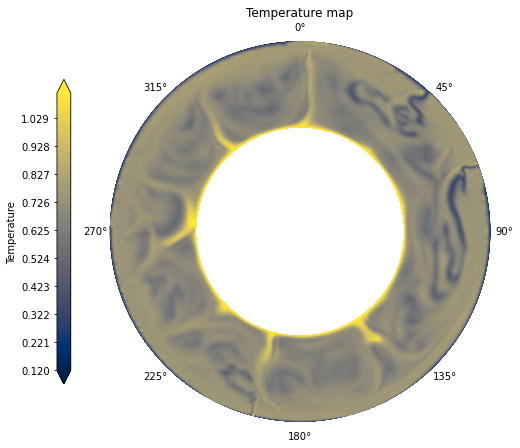

In [25]:
# --- Plot

title  = 'Temperature map'
output = contourfMap(sd,plotparam=ppar_t,title=title)

The function 'contourfMap' of the StagViewer module of **pypStag** allows to generate advanced visualization option like display the corresponding velocity field above the map (as we already saw for cartesian geometries) and generate what we call a 'pollen plot'.

A 'pollen plot' is the representation of a 1D slice (iso-depth) of an annulus field above the representation of a 2D annulus field. This type of representation allows the user to visualize in detail and in the same time a 1D slice of the annulus and the 2D annulus itself. This representation takes this name 'pollen plot' because the resulting figure looks like a pollen view with a microscope.

Let's start first with a basic example where the pollen plot displays the surface field of the 2D annulus bellow. For that we will start from the overlying example and activate the option 'pollenPlot' of the 'contourfMap' function.

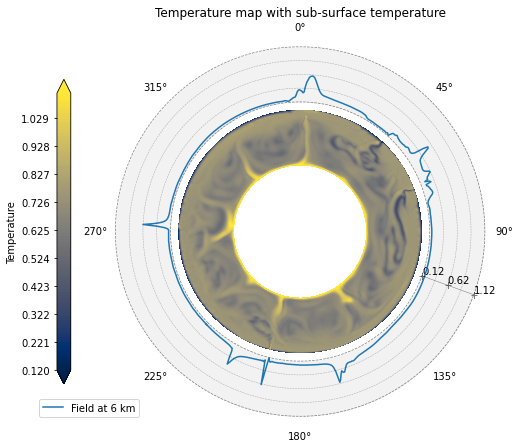

In [26]:
# --- Plot

title  = 'Temperature map with sub-surface temperature'
output = contourfMap(sd,pollenPlot=True,layer=-1,plotparam=ppar_t,title=title)

In the overlying figure, the blue line represents the surface temperature of the model. To resize pollen plot y-axis bounds, you can creat give the the 'plotparam_pollen' argument of 'contourfMap' a new instance of PlotParam.
The following example shows you an example with the 'plotparam_pollen' argument. To explore the functionalities of the contourfMap function, we also now represent the temperature just above the CMB (Core-Mantle Boundary) in the pollen plot.

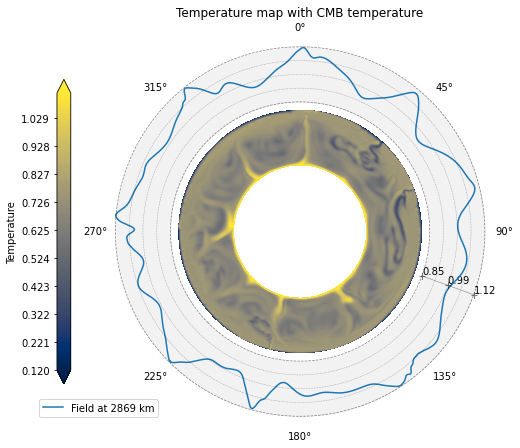

In [27]:
ppar_t2  = PlotParam(vmin=0.85,vmax=1.12)

# --- Plot

title  = 'Temperature map with CMB temperature'
layer  = 1
output = contourfMap(sd,pollenPlot=True,layer=layer,plotparam=ppar_t,plotparam_pollen=ppar_t2,title=title)

The argument 'pollenData' of the function 'contourfMap' allows the user to change the displayed field in the pollen plot. The following example shows you a 2D temperature field and a 1D horizontal velocity field.

In [28]:
# --- Read and process the velocity

directory2 = './test_data'
fname2     = '2D_conv_dome_vp00154'

sd2 = StagData(geometry='annulus')
sd2.verbose = True
sd2.stagImport(directory2, fname2)
sd2.stagProcessing()

>> stagData| Reading and resampling: 2D_conv_dome_vp00154
>> stagData|   - 2D data detected: plan yz
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 768
>> stagData|     - Nz = 128
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 1
>> stagData|     - Ny = 768
>> stagData|     - Nz = 128
>> stagData|   - Vectorial field detected: 4 fields
>> stagData|     -> Velocity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 2D annulus grid geometry
>> stagData|       - data detected: plan yz
>> stagData|       - Creation of the spherical grids
>> stagData|       - Build data grid for vectorial field
>> stagData|       - Merging of velocities: YY -> Cartesian
>> stagData|       - Conversion of Velocities: Cartesian -> Spherical
>> stagData| Processing of stag data done!


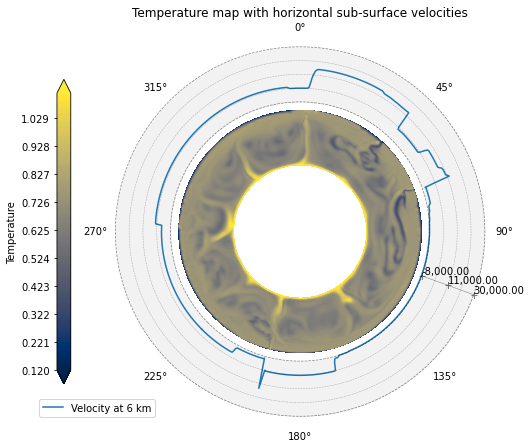

In [29]:
ppar_vp  = PlotParam(vmin=-8e3,vmax=3e4)

# --- Plot

title  = 'Temperature map with horizontal sub-surface velocities'
layer  = -1
output = contourfMap(sd,pollenPlot=True,pollenData=sd2,pollenField='vphi',layer=layer,plotparam=ppar_t,plotparam_pollen=ppar_vp,title=title)

As mentioned above, the function 'contourfMap' allows the user (as for cartesian maps) to display the velocity field above the 2D annulus.

To do so, enter the velocity field as a pypStag.StagData object in the option 'stagVelocity'. Here below an example.

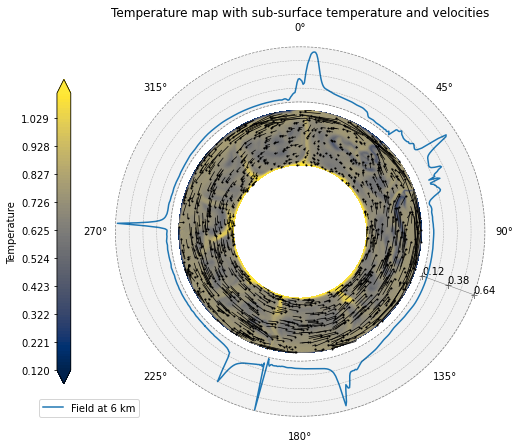

In [30]:
# Add the following arguments to your ppar_vp PlotParam instance.
ppar_vp.vscale = 3e4        # scale of the vectors
ppar_vp.arrow_width = 0.7   # width of the arrows (as the matplotlib linewidth argument)
ppar_vp.qscale = 1e4        # scale of the legend
ppar_vp.noa = 1000          # number of arrows

# Modify ppar_t2
ppar_t2.vmin = 0.12
ppar_t2.vmax = 0.64

# --- Plot

title  = 'Temperature map with sub-surface temperature and velocities'
layer  = -1
output = contourfMap(sd,pollenPlot=True,stagVelocity=sd2,pollenField='v',layer=layer,plotparam=ppar_t,plotparam_pollen=ppar_t2,title=title)

### **4. Maps of a Yin Yang object**

Now we have explored the visualization of a Catesian and annulus data, in this chapter we will see how to represent with maps a 3D Yin Yang object with **pypStag**. The first step is to read your Stag data creating a pypStag.StagData object as showed in the Lesson #01.

Let's start by reading a simple scalar field as a temperature field.

In [4]:
# --- Read and process

# # Set the path and the name of your Stag file

directory = './test_data'
fname = 'lowRh_t01300'

In [5]:
# Creat a StagData object from our file

sd = StagData(geometry='yy')
sd.stagImport(directory, fname)
sd.stagProcessing()

>> stagData| Reading and resampling: lowRh_t01300
>> stagData|   - 3D data detected
>> stagData|     -> YinYang grid detected
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Temperature
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - Yin-Yang grid geometry
>> stagData|       - Preprocessing of coordinates matrices
>> stagData|       - Creation of the Yin-Yang grids
>> stagData|       - Assembly Yin and Yang grids
>> stagData|   - Construction of the appropriated vectorial field:
>> stagData|       - Build data for the entire grids
>> stagData|       - Processing of redFlags
>> stagData|   - Gather Yin and Yang: all Yin then all Yang
>> stagData| 

Then, the second step, optional, consists in creat a PlotParam instance that will allow you to define graphical parameters. In the case you do not asign it to the plot function, a default version will be computed.

In [33]:
# --- Define your generic plot parameters option:

ppar_t   = PlotParam(cmap=plt.cm.inferno,save=False,\
                     vmin=0,vmax=1,show=True,figsize=(10,5),nol=100,\
                     cbar=True,cbar_location='left')

To compute the map of your Yin Yang object, call the function 'contourfMap'. This function has only one mandatory argument, your pypStag.StagData object, all the other aguments are optional.


With the function 'contourfMap' of **pypStag** the user has two main visualization options to produce 2D figures within a 3D Yin Yang grid.
 - A slice in the 3D spherical Yin Yang grid according to a given slicing plan centered on (0,0,0) and define with its normal vector. This option will generate an annulus figure.
 - Or, alternatively, a 2D map at a given depth, like a surface map for instance.

For a Yin Yang object, among the optional arguments of 'contourf' that will have an effect on your figure their is:
 - field = str, defines the field of your object you want to represent.
    'v' for the main (scalar field)
    'vx', 'vy', 'vz' for cartesian components of a vectorial field
    'vr', 'vtheta', 'vphi' for spherical components of a vectorial field.
 - axis = int or str. Define the axis of the slice.
    If axis = 0 or axis = 'annulus', then the function will generate an annulus plot according to a slicing plan define by its normal vector given by the argument 'normal'.
    If axis = 1 or axis = layer', then the function will generate a layer map at a given depth define by the argument 'layer'.
 - layer = int, depth index of the slice if axis = 1 or axis = 'layer'.
 - normal = list of three int/float, defines the normal of the slicing plan as define in paraview, only if axis = 0. Take the form: normal = (nx,ny,nz. (Default: normal = [1,0,0])
 - stagVelocity = pypStag.StagData object containing the velocity field of the main pypStag.StagData.
 - locate = list or list of dimension 2 = list of [lon,lat] (*in degrees*) of points to locate on the annulus is axis = 0 or axis = 'annulus'.
 - method = str: can be 'tri' or 'interp'. This parameter defines the graphical method of representation. If method = 'tri' then the map will be generated directly from the sliceData with triangulation (tricontourf). If method = 'interp' then the ma will be generated using first an interpolation on a regular lon/lat grid and then displayed with pcolormesh. NOTE: we recommend the 'tri' (triangulation) method [default, method = 'tri']
 - interp_method = str, interpolation method used to interpolate the extract slice on a new regular 2D grid. This parameter define the option of the function 'scipy.interpolate.griddata'. [Default, interp_method = 'nearest']
 - pollenPlot = bool, if yes then generate a 'pollen plot'
 - pollenData = pypStag.StagData object that can be displayed on the pollen plot
 - layer = int, define the layer you want to display in the pollen plot [Default layer = -1 (surface)]. Only active if pollenPlot is True.
 - pollenField = str, equivalent to the argument field but for the pollen plot.
 - plotparam = PlotParam instance, define the graphical parameter of the plot
 - plotparam_velo = PlotParam instance, defines the graphical parameters of the velocity field
 - plotparam_pollen = PlotParam instance, defines the graphical parameters of the pollen plot
 - title = str, title of the plot
 - verbose = bool, if True, displays a verbose output

Let's start first with an annulus slice on the 3D Yin Yang grid. This option is set with the argument axis='annulus' on the 'contourfMap' function.

For an annulus plot on a 3D Yin Yang dataset, the first step is to define the normal of our slicing plan. Note that the normal vector you have to give in argument to the function contourfMap has the same definition as the normal vector in the software Paraview and therefore will generate the same figure!

The normal vector to the slicing plan can be set by hand as followed:

In [46]:
normal = [1,0,1]   # for instance

Or, the normal vector can be computed as the normal of the plan passing by to points on the surface of the sphere defined by their longitude and their latitude. The function 'get_normal_2points' of the module pypStag.stagCompute makes for you this computation. The following example shows you how to compute the normal of the plan passing by the points (-79.8,-17.44) and (-63.1,-15.4) and displays the resulting annulus slice.

>> get_normal_2points| Compute the normal vector of the plan passing by:
>> get_normal_2points|    -> lon1,lat1 = -79.8, -17.44
>> get_normal_2points|    -> lon2,lat2 = -63.1, -15.4
>> get_normal_2points|    -> x0,y0,z0  = 0, 0, 0
>> get_xzy_scoords| Search the nearest point to:
>> get_xzy_scoords| lon = -79.8, lat = -17.44
>> get_xzy_scoords|    -> Point index: 32246
>> get_xzy_scoords|    -> found lon/lat: -79.8, -17.22
>> get_xzy_scoords| Search the nearest point to:
>> get_xzy_scoords| lon = -63.1, lat = -15.4
>> get_xzy_scoords|    -> Point index: 31139
>> get_xzy_scoords|    -> found lon/lat: -62.92, -15.11
>> get_normal_2points| Done
>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| REMINDER:  With the annulus slicing, you will loose the dual Ying Yang description
>> sliceData| Extraction of an annulus slice (i.e. axis=0
>> sliceData|    Normal to the slicing plan: -0.05469113020997663,-0.4994400084126787,1.5541311386226555
>> sliceDa

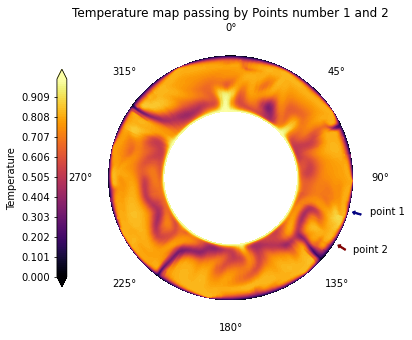

In [34]:
from pypStag.stagCompute import get_normal_2points

point1 = [-79.8,-17.44] # lon1, lat1  (in degrees)
point2 = [-63.1,-15.4]  # lon2, lat2  (in degrees)

normal = get_normal_2points(sd,point1,point2)  # it takes in input a pypStag.stagData object to have access to your grid

title  = 'Temperature map passing by Points number 1 and 2'
output = contourfMap(sd,axis='annulus',normal=normal,plotparam=ppar_t,title=title,locate=[point1,point2])

As mentioned above, another way to display in 2D a 3D yin Yang dataset is to display slice at a given depth. To do so, the user must give the following argument to the 'contourfMap' function: axis = 'layer'

Here below a basic example with a map of the surface temperature on the sphere.

>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| Extraction of a depth slice from a Yin Yang (i.e. axis=1)
>> sliceData| Stack grid matrices
>> sliceData| Stack fields
>> sliceData| Stacking done successfully!
>> sliceData| Extraction done successfully!
>> sliceData|     - layer        = -1
>> sliceData|     - pts in slice = 46028


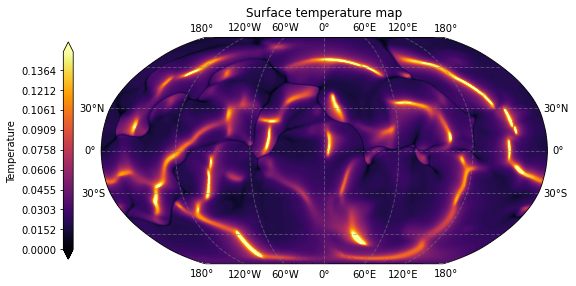

In [35]:
# Resize the bounds of temperature

ppar_t.vmin = 0
ppar_t.vmax = 0.15

# --- Plot
title  = 'Surface temperature map'
output = contourfMap(sd,axis='layer',plotparam=ppar_t,title=title)

If you give a normal vector to 'contourfMap' while the 'axis' argument is 'layer', then the function will display the projection of the slicing plan define by the normal vector you enter. Below, the same figure as above but with the location of the slicing plan we used to compute the previous annulus figure.

>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| Extraction of a depth slice from a Yin Yang (i.e. axis=1)
>> sliceData| Stack grid matrices
>> sliceData| Stack fields
>> sliceData| Stacking done successfully!
>> sliceData| Extraction done successfully!
>> sliceData|     - layer        = -1
>> sliceData|     - pts in slice = 46028
>> contourfMap| Compute the projection of the slicing annulus plan at the surface of the sphere


/home/alexandre/Alexandre/BibliothekaAlexandrina/7-These-GPRE/pypStag/pypStag_0.5/pypStag/stagViewer.py:1051: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


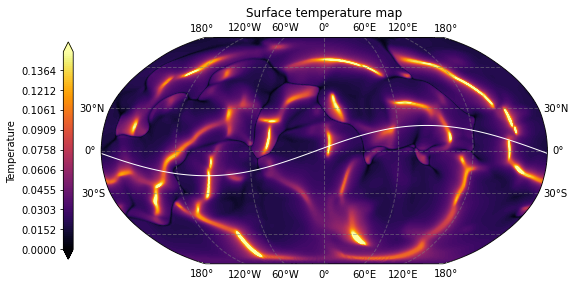

In [36]:
# Resize the bounds of temperature
ppar_t.vmin = 0
ppar_t.vmax = 0.15

ppar_t.linecolor = 'white' # color of the line representing the slicing plan

# --- Plot
title  = 'Surface temperature map'
output = contourfMap(sd,axis='layer',normal=normal,plotparam=ppar_t,title=title)

The function 'contourfMap' of the StagViewer module of **pypStag** allows to generate advanced visualization option like display the corresponding velocity field above the map (as we already saw for cartesian geometries) and generate what we call a 'pollen plot' when you decide to take a slice on your Yin Yang data define by a normal vector (axis=0).

A 'pollen plot' is the representation of a 1D slice (iso-depth) of an annulus field above the representation of a 2D annulus field. This type of representation allows the user to visualize in detail and in the same time a 1D slice of the annulus and the 2D annulus itself. This representation takes this name 'pollen plot' because the resulting figure looks like a pollen view with a microscope.

Nota Bene. To make it simplier, the pollen plot of a Yin Yang dataset is define as for an annulus dataset and return the same render view. See the Chapter on the Annulus dataset for more details or examples if needed.

Let's start first with an example where the pollen plot displays the surface field of the 2D annulus bellow. For that we will start from the overlying example and activate the option 'pollenPlot' of the 'contourfMap' function.

>> get_normal_2points| Compute the normal vector of the plan passing by:
>> get_normal_2points|    -> lon1,lat1 = -79.8, -17.44
>> get_normal_2points|    -> lon2,lat2 = -63.1, -15.4
>> get_normal_2points|    -> x0,y0,z0  = 0, 0, 0
>> get_xzy_scoords| Search the nearest point to:
>> get_xzy_scoords| lon = -79.8, lat = -17.44
>> get_xzy_scoords|    -> Point index: 32246
>> get_xzy_scoords|    -> found lon/lat: -79.8, -17.22
>> get_xzy_scoords| Search the nearest point to:
>> get_xzy_scoords| lon = -63.1, lat = -15.4
>> get_xzy_scoords|    -> Point index: 31139
>> get_xzy_scoords|    -> found lon/lat: -62.92, -15.11
>> get_normal_2points| Done
>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| REMINDER:  With the annulus slicing, you will loose the dual Ying Yang description
>> sliceData| Extraction of an annulus slice (i.e. axis=0
>> sliceData|    Normal to the slicing plan: -0.05469113020997663,-0.4994400084126787,1.5541311386226555
>> sliceDa

/home/alexandre/Alexandre/BibliothekaAlexandrina/7-These-GPRE/pypStag/pypStag_0.5/pypStag/stagViewer.py:1051: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


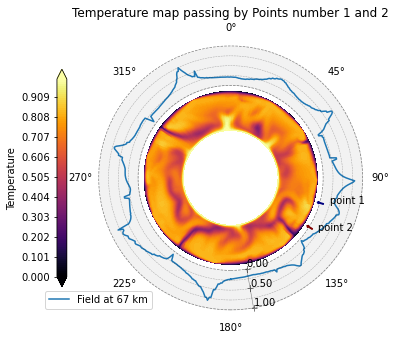

In [37]:
ppar_t.vmin   = 0    # Resize the bounds of temperature
ppar_t.vmax   = 1
ppar_t.rticks = True     # radial ticks
ppar_t.theta_ticks = 170 # location of the axis

from pypStag.stagCompute import get_normal_2points

point1 = [-79.8,-17.44] # lon1, lat1  (in degrees)
point2 = [-63.1,-15.4]  # lon2, lat2  (in degrees)

normal = get_normal_2points(sd,point1,point2)  # it takes in input a pypStag.stagData object to have access to your grid

title  = 'Temperature map passing by Points number 1 and 2'
output = contourfMap(sd,axis='annulus',normal=normal,pollenPlot=True,layer=-5,plotparam=ppar_t,title=title,locate=[point1,point2])

In the overlying figure, the blue line represents the temperature of the model at 67 km depth. To resize pollen plot y-axis bounds, you can creat give the the 'plotparam_pollen' argument of 'contourfMap' a new instance of PlotParam.

As for an annulus StagYY grid, the argument 'pollenData' of the function 'contourfMap' allows the user to change the displayed field in the pollen plot. The following example shows you a 2D temperature field and a 1D sub-surface viscosity field.

In [38]:
# --- Read and process the viscosity

directory2 = './test_data'
fname2     = 'lowRh_eta01300'

sd2 = StagData(geometry='yy')
sd2.verbose = True
sd2.stagImport(directory2, fname2)
sd2.stagProcessing()

>> stagData| Reading and resampling: lowRh_eta01300
>> stagData|   - 3D data detected
>> stagData|     -> YinYang grid detected
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Viscosity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - Yin-Yang grid geometry
>> stagData|       - Preprocessing of coordinates matrices
>> stagData|       - Creation of the Yin-Yang grids
>> stagData|       - Assembly Yin and Yang grids
>> stagData|   - Construction of the appropriated vectorial field:
>> stagData|       - Build data for the entire grids
>> stagData|       - Processing of redFlags
>> stagData|   - Gather Yin and Yang: all Yin then all Yang
>> stagData| 

In [39]:
# --- PlotParam instance for the viscosity

ppar_eta = PlotParam(log10=True,vmin=-3,vmax=4)

>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| REMINDER:  With the annulus slicing, you will loose the dual Ying Yang description
>> sliceData| Extraction of an annulus slice (i.e. axis=0
>> sliceData|    Normal to the slicing plan: -0.05469112990997663,-0.4994400081126787,1.5541311389226555
>> sliceData|    Search on the plan
>> sliceData|     -> Optimization of the search
>> sliceData|     -> Final thickness of the pre-slice: 0.02101017647252634
>> sliceData|    Projection on the plan
>> sliceData| Stack grid matrices
>> sliceData| Stack fields
>> sliceData| Stacking done successfully!
>> sliceData|    - build ideal annulus geometry
>> sliceData|    - Compute the annulus
>> sliceData|    - interpolation on the annulus
>> sliceData|      -> Number of data points: 37026
>> sliceData|      -> Number of new points:  34368
>> sliceData| Slicing done successfully!
>> sliceData|     -> Time for the interpolation: 0.05800223350524902
>> sliceDa

/home/alexandre/Alexandre/BibliothekaAlexandrina/7-These-GPRE/pypStag/pypStag_0.5/pypStag/stagViewer.py:1051: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


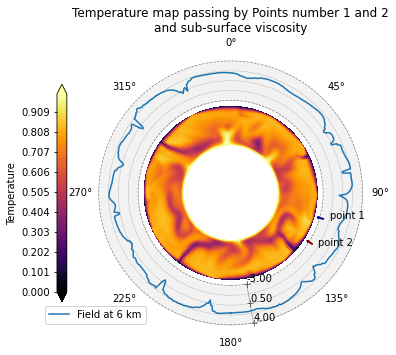

In [40]:
# --- Plot

axis   = 'annulus'
layer  = -1
normal = normal
pollenPlot  = True
pollenData  = sd2
pollenField = 'v'

title = 'Temperature map passing by Points number 1 and 2\nand sub-surface viscosity'
prof = contourfMap(sd,field='v',pollenPlot=pollenPlot,axis=axis,pollenData=pollenData,pollenField=pollenField,normal=normal,layer=layer,method='tri',interp_method='nearest',plotparam=ppar_t,plotparam_pollen=ppar_eta,locate=[point1,point2],title=title)


Then, as mentioned above, the function 'contourfMap' allows the user (as for cartesian maps and annulus maps) to display the velocity field above the 2D annulus or you 2D 'layer' maps.

To do so, enter the velocity field as a pypStag.StagData object in the option 'stagVelocity'. Here below an example.

In [41]:
# --- Read and process the velocity
 
directory = './test_data'
fname = 'lowRh_vp01300'

sd3 = StagData(geometry='yy')
sd3.stagImport(directory, fname)
sd3.stagProcessing()

>> stagData| Reading and resampling: lowRh_vp01300
>> stagData|   - 3D data detected
>> stagData|     -> YinYang grid detected
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - Vectorial field detected: 4 fields
>> stagData|     -> Velocity
>> stagData| Reading and resampling operations done!
>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - Yin-Yang grid geometry
>> stagData|       - Preprocessing of coordinates matrices
>> stagData|       - Creation of the Yin-Yang grids
>> stagData|       - Assembly Yin and Yang grids
>> stagData|   - Construction of the appropriated vectorial field:
>> stagData|       - Build data for the entire grids
>> stagData|       - Merging of velocities: YY -> Cartesian
>> stagData|       - Processing of redFlags
>>

In [42]:
# PlotParam instance for the velocity field
ppar_vp  = PlotParam(vscale=2e3,arrow_width=0.7,qscale=5e2,noa=2000,vmin=-100,vmax=100)

>> sliceData| Begin the slice extraction
>> sliceData|   - Scalar field detected
>> sliceData| REMINDER:  With the annulus slicing, you will loose the dual Ying Yang description
>> sliceData| Extraction of an annulus slice (i.e. axis=0
>> sliceData|    Normal to the slicing plan: -0.05469112950997662,-0.49944000771267866,1.5541311393226556
>> sliceData|    Search on the plan
>> sliceData|     -> Optimization of the search
>> sliceData|     -> Final thickness of the pre-slice: 0.02101017647252634
>> sliceData|    Projection on the plan
>> sliceData| Stack grid matrices
>> sliceData| Stack fields
>> sliceData| Stacking done successfully!
>> sliceData|    - build ideal annulus geometry
>> sliceData|    - Compute the annulus
>> sliceData|    - interpolation on the annulus
>> sliceData|      -> Number of data points: 37026
>> sliceData|      -> Number of new points:  34368
>> sliceData| Slicing done successfully!
>> sliceData|     -> Time for the interpolation: 0.05243229866027832
>> sliceD

/home/alexandre/Alexandre/BibliothekaAlexandrina/7-These-GPRE/pypStag/pypStag_0.5/pypStag/stagViewer.py:1051: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


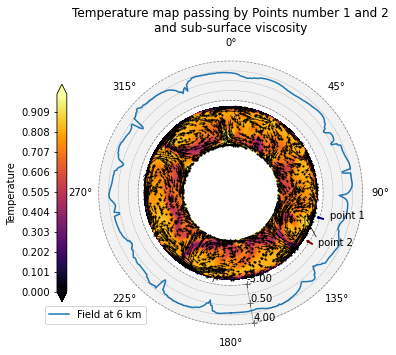

In [43]:
# --- Plot

axis         = 'annulus'
layer        = -1
normal       = normal
pollenPlot   = True
pollenData   = sd2
pollenField  = 'v'
stagVelocity = sd3

title = 'Temperature map passing by Points number 1 and 2\nand sub-surface viscosity'
prof = contourfMap(sd,field='v',pollenPlot=pollenPlot,axis=axis,pollenData=pollenData,pollenField=pollenField,normal=normal,layer=layer,stagVelocity=stagVelocity,method='tri',interp_method='nearest',plotparam=ppar_t,plotparam_pollen=ppar_eta,locate=[point1,point2],title=title,plotparam_velo=ppar_vp)